### PROBLEM STATEMENT

Goal: To build a machine learning model that predicts whether a person has diabetes based on medical attributes such as glucose level, BMI, age, and insulin.

### IMPORT LIBRARIES

In [1]:
#DATA MANIPULATION LIBRARIES
import pandas as pd
import numpy as np

#DATA VISUALIZATION LIBRARIES
import seaborn as sns
import matplotlib.pyplot as plt

#MACHINE LEARNING LIBRARIES
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#ALGORITHMS
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRFClassifier

import warnings
warnings.filterwarnings('ignore')

### LOAD THE DATASET

In [2]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,108,78,18,65,28.9,0.14,69,0
1,11,123,77,33,93,35.8,0.29,34,1
2,8,139,64,11,98,37.8,1.56,67,1
3,1,140,63,18,120,36.7,0.57,39,1
4,8,121,78,36,58,30.2,1.77,31,0
...,...,...,...,...,...,...,...,...,...
4495,14,165,68,12,124,28.3,0.27,51,1
4496,9,120,67,25,89,31.8,0.14,42,0
4497,7,112,92,13,86,26.0,2.35,29,0
4498,9,107,67,11,134,27.2,0.75,47,0


### DIABETES OVERVIEW

- Rows: 4500

- Features: 9

- Target: Diabetes:

                    0 → No Diabetes
                    1 → Diabetes

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,108,78,18,65,28.9,0.14,69,0
1,11,123,77,33,93,35.8,0.29,34,1
2,8,139,64,11,98,37.8,1.56,67,1
3,1,140,63,18,120,36.7,0.57,39,1
4,8,121,78,36,58,30.2,1.77,31,0


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4495,14,165,68,12,124,28.3,0.27,51,1
4496,9,120,67,25,89,31.8,0.14,42,0
4497,7,112,92,13,86,26.0,2.35,29,0
4498,9,107,67,11,134,27.2,0.75,47,0
4499,9,116,63,21,82,21.3,1.01,45,0


### BASIC UNDERSTANDING OF DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               4500 non-null   int64  
 1   Glucose                   4500 non-null   int64  
 2   BloodPressure             4500 non-null   int64  
 3   SkinThickness             4500 non-null   int64  
 4   Insulin                   4500 non-null   int64  
 5   BMI                       4500 non-null   float64
 6   DiabetesPedigreeFunction  4500 non-null   float64
 7   Age                       4500 non-null   int64  
 8   Outcome                   4500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 316.5 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000,4500.000000
mean,6.896222,132.941333,71.563333,24.631778,97.358000,30.265511,1.295269,44.909556,0.451333
std,4.297053,21.428868,9.987333,8.048680,35.964784,4.682205,0.694465,14.247348,0.497681
min,0.000000,64.000000,38.000000,0.000000,0.000000,15.800000,0.100000,21.000000,0.000000
25%,3.000000,117.000000,65.000000,19.000000,72.000000,27.200000,0.700000,33.000000,0.000000
50%,7.000000,132.000000,72.000000,25.000000,97.000000,30.200000,1.300000,45.000000,0.000000
75%,11.000000,149.000000,78.000000,30.000000,122.250000,33.500000,1.890000,58.000000,1.000000
max,14.000000,202.000000,106.000000,60.000000,228.000000,45.500000,2.500000,69.000000,1.000000


In [7]:
df.shape

(4500, 9)

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### CHECKING NULL VALUES

In [9]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### EXPLORATORY DATA ANALYSIS(EDA)

### DIABETES DISTRIBUTION

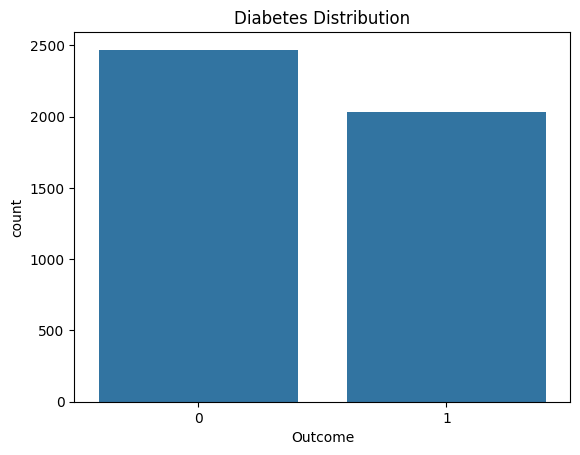

In [10]:
sns.countplot(x = 'Outcome', data = df)
plt.title("Diabetes Distribution")
plt.show()

### PREGNANCY DISTRIBUTION

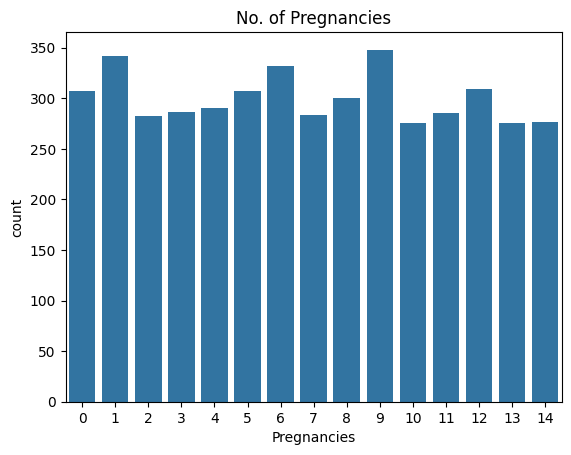

In [11]:
sns.countplot(x = 'Pregnancies', data = df)
plt.title("No. of Pregnancies")
plt.show()

### FEATURE DISTRIBUTION

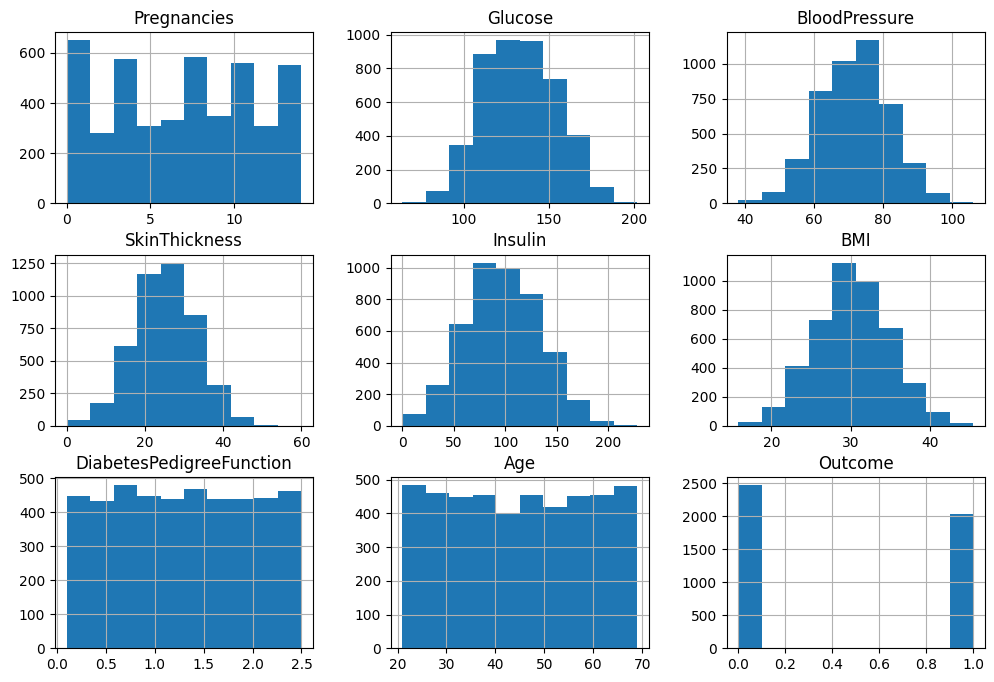

In [12]:
df.hist(figsize=(12,8))
plt.show()

### CORRELATION HEATMAP

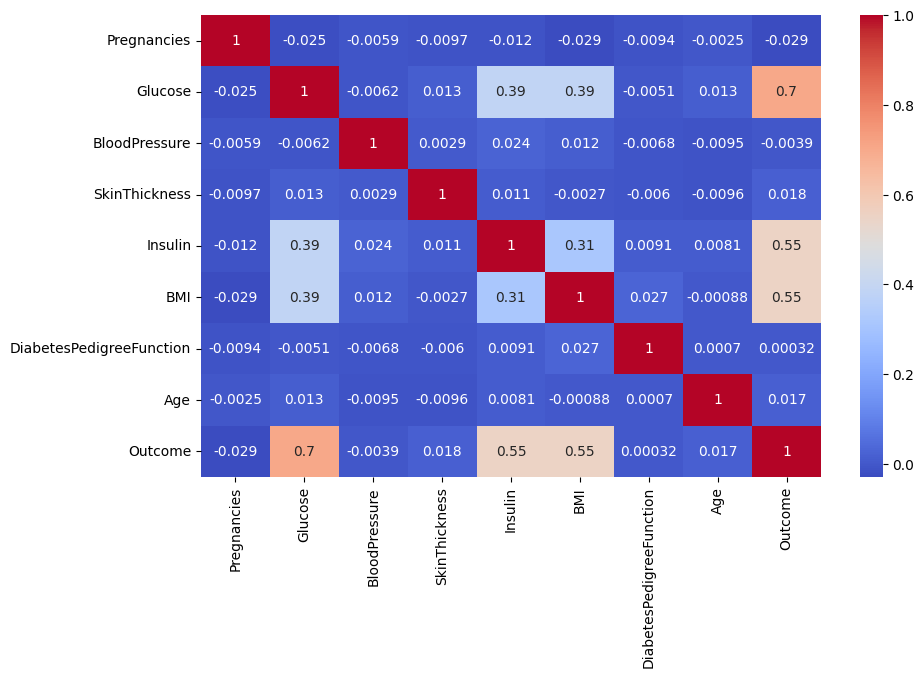

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

### FEATURE AND TARGET SPLITING

In [3]:
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [4]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0,108,78,18,65,28.9,0.14,69
1,11,123,77,33,93,35.8,0.29,34
2,8,139,64,11,98,37.8,1.56,67
3,1,140,63,18,120,36.7,0.57,39
4,8,121,78,36,58,30.2,1.77,31
...,...,...,...,...,...,...,...,...
4495,14,165,68,12,124,28.3,0.27,51
4496,9,120,67,25,89,31.8,0.14,42
4497,7,112,92,13,86,26.0,2.35,29
4498,9,107,67,11,134,27.2,0.75,47


### TRAIN AND TEST SPLIT

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
                                                     X, y, test_size = 0.25, random_state=42)

### MODEL BUILDING & EVALUATION

In [53]:
# MODEL BUILDING - LOGESTIC REGRESSION

lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [54]:
# MODEL EVALUATION - LOGESTIC REGRESSION

y_pred_lr = lr.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_lr))
cm_lr = classification_report(y_test, y_pred_lr)

Accuracy Score: 0.8133333333333334


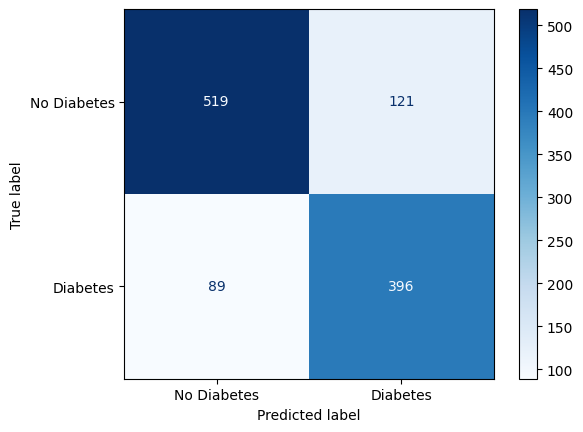

In [55]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_lr, 
    display_labels=["No Diabetes", "Diabetes"],
    cmap=plt.cm.Blues)

plt.grid(False)
plt.show()

In [56]:
# MODEL BUILDING - DECISION TREE CLASSIFIER

dtc = DecisionTreeClassifier(
    random_state=42)
dtc.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [57]:
# MODEL EVALUATION - DECISION TREE CLASSIFIER

y_pred_dtc = dtc.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_dtc))
cm_dtc = classification_report(y_test, y_pred_dtc)

Accuracy Score: 0.8755555555555555


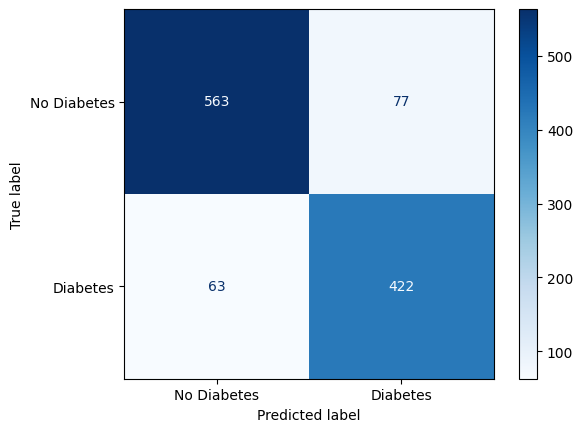

In [58]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_dtc, 
    display_labels=["No Diabetes", "Diabetes"],
    cmap=plt.cm.Blues)

plt.grid(False)
plt.show()

In [65]:
# MODEL BUILDING - RANDOM FOREST CLASSIFIER

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [67]:
# MODEL EVALUATION - RANDOM FOREST CLASSIFIER

y_pred_rfc = rfc.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_rfc))
cm_dtc = classification_report(y_test, y_pred_rfc)

Accuracy Score: 0.9137777777777778


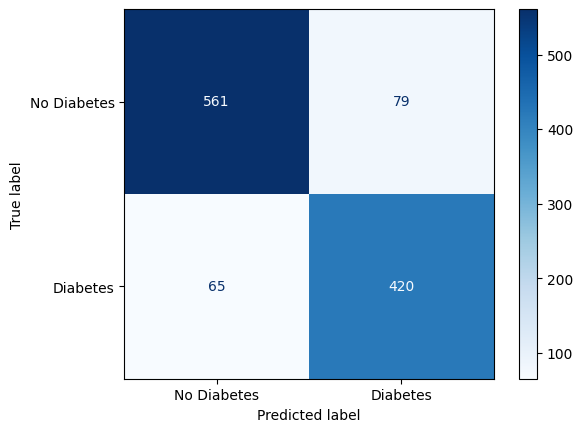

In [25]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rfc, 
    display_labels=["No Diabetes", "Diabetes"],
    cmap=plt.cm.Blues)

plt.grid(False)
plt.show()

In [68]:
# MODEL BUILDING - K-NEIGHBORS CLASSIFIER

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [69]:
# MODEL EVALUATION - K-NEIGHBORS CLASSIFIER

y_pred_knn = knn.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_knn))
cm_knn = classification_report(y_test, y_pred_knn)

Accuracy Score: 0.88


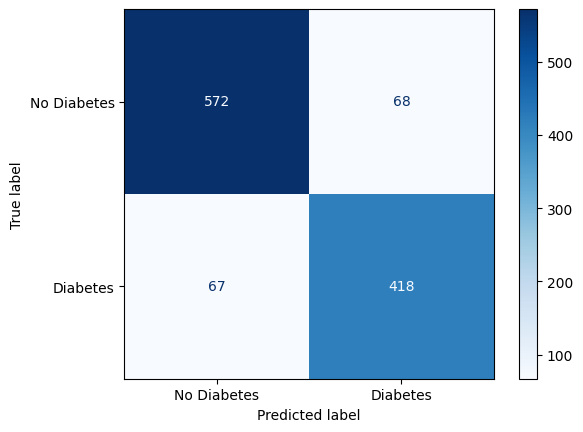

In [70]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_knn, 
    display_labels=["No Diabetes", "Diabetes"],
    cmap=plt.cm.Blues)

plt.grid(False)
plt.show()

In [71]:
# MODEL BUILDING - SUPPORT VECTOR MACHINE

svm = SVC()
svm.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [72]:
# MODEL EVALUATION - SUPPORT VECTOR MACHINE

y_pred_svm = svm.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_svm))
cm_svm = classification_report(y_test, y_pred_svm)

Accuracy Score: 0.9164444444444444


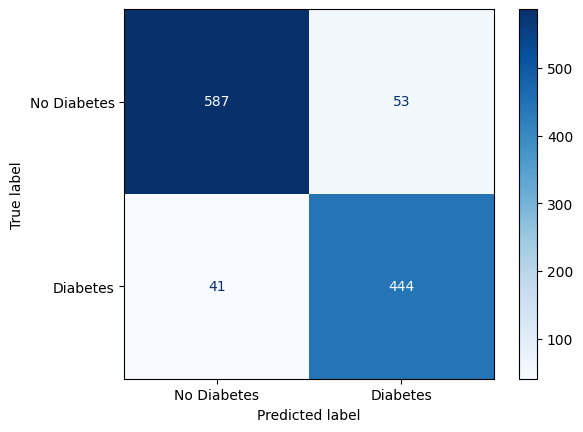

In [73]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_svm, 
    display_labels=["No Diabetes", "Diabetes"],
    cmap=plt.cm.Blues)

plt.grid(False)
plt.show()

In [74]:
# MODEL BUILDING - XGBOOST

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [75]:
# MODEL EVALUATION - XGBOOST

y_pred_xgb = xgb.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
cm_xgb = classification_report(y_test, y_pred_xgb)

Accuracy Score: 0.9022222222222223


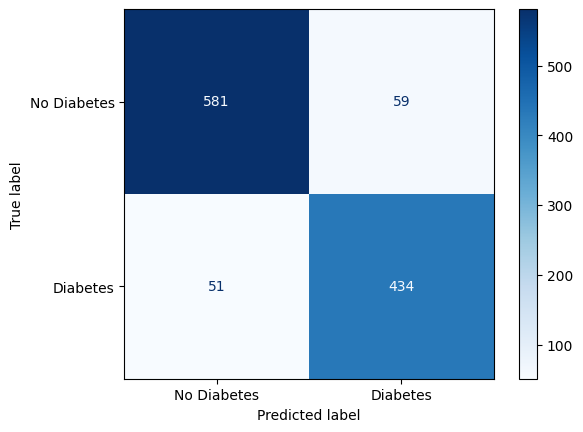

In [34]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgb, 
    display_labels=["No Diabetes", "Diabetes"],
    cmap=plt.cm.Blues)

plt.grid(False)
plt.show()

In [76]:
# MODEL BUILDING - XGBRF

xgbrf = XGBRFClassifier()
xgbrf.fit(X_train, y_train)

,learning_rate,1.0
,subsample,0.8
,colsample_bynode,0.8
,reg_lambda,1e-05
,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bytree,None
,device,None


In [77]:
# MODEL EVALUATION - XGBRF

y_pred_xgbrf = xgbrf.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred_xgbrf))
cm_xgbrf = classification_report(y_test, y_pred_xgbrf)

Accuracy Score: 0.9137777777777778


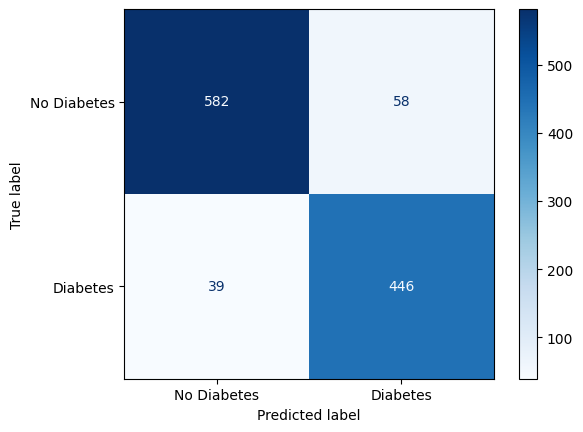

In [78]:
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_xgbrf, 
    display_labels=["No Diabetes", "Diabetes"],
    cmap=plt.cm.Blues)

plt.grid(False)
plt.show()

### SAVE THE HIGH ACCURACY MODEL

In [79]:
import pickle

filename = "Diabetes-Prediction-model.pkl"

#models

pickle.dump(svm, open("Diabetes-Prediction-model.pkl", "wb"))

print("Diabetes-Prediction-model.pkl Saved...")

Diabetes-Prediction-model.pkl Saved...


In [80]:
#LOAD THE MODEL

load_model = pickle.load(open(filename, "rb"))

In [81]:
df.head(15)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,108,78,18,65,28.9,0.14,69,0
1,11,123,77,33,93,35.8,0.29,34,1
2,8,139,64,11,98,37.8,1.56,67,1
3,1,140,63,18,120,36.7,0.57,39,1
4,8,121,78,36,58,30.2,1.77,31,0
5,9,114,64,26,82,21.8,1.98,59,0
6,1,130,72,26,68,26.0,2.14,21,0
7,8,140,73,42,125,36.3,0.42,55,1
8,5,149,75,26,146,34.0,1.19,39,1
9,10,167,80,19,145,36.3,2.37,53,1


### LET'S PREDICT......

In [85]:
load_model.predict([[12, 107, 92, 33, 68, 31.7, 1.16, 27]])

array([0], dtype=int64)

In [86]:
load_model.predict([[2, 102, 90, 14, 65, 21.2, 0.5, 25]])

array([0], dtype=int64)

In [88]:
load_model.predict([[5, 140, 66, 35, 127, 37.6, 1.31, 44]])

array([1], dtype=int64)